# Global Suicide Data 1985-2016 

#### Presentation:

##### https://slides.com/peterferenci/deck/live?context=editing#/

### Import libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly as py
import cufflinks as cf

cf.go_offline()

### Import data

In [36]:
#downloaded from kaggle - data by World Bank, UN, WHO

df = pd.read_csv('suicide.csv')

df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


### Data Cleaning

In [4]:
df.shape

(27820, 12)

In [38]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [6]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [7]:
#only the Human Developement Index seems to missing significant data, 
#but I'm not dropping it yet as later I might compare the countries that do have it available

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

missing_alot = missing_value_df.loc[missing_value_df['percent_missing'] > 20]
missing_alot.head()

,column_name,percent_missing
HDI for year,HDI for year,69.935298


### Spain Insights

In [101]:
df_spain = df[df['country'] == 'Spain']

df_gender = df_spain.pivot_table(index = 'sex', values = 'suicides_no', aggfunc = 'sum')

df_gender.iplot(kind='bar', title='Number of Suicides by Gender in Spain', color ='gold')

In [95]:
df_age = df_spain.pivot_table(values='suicides_no', columns='sex', index='age', aggfunc='sum')
df_age = df_age.reindex(['5-14 years','15-24 years','25-34 years','55-74 years','75+ years'])

df_age.iplot(kind='bar', subplots=True, title='Number of Suicides by Age in Spain')

In [56]:
df_2010 = df[df.year==2010]

df_2010.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
252,Albania,2010,male,55-74 years,20,241852,8.27,Albania2010,0.722,"11,926,953,259",4359,Silent
253,Albania,2010,male,35-54 years,20,371611,5.38,Albania2010,0.722,"11,926,953,259",4359,Generation X
254,Albania,2010,male,25-34 years,9,179720,5.01,Albania2010,0.722,"11,926,953,259",4359,Generation X
255,Albania,2010,male,75+ years,2,50767,3.94,Albania2010,0.722,"11,926,953,259",4359,Silent
256,Albania,2010,male,15-24 years,10,279508,3.58,Albania2010,0.722,"11,926,953,259",4359,Millenials


In [107]:
df_piv = df.pivot_table(index=['country','year'], values= ['suicides_no','population','gdp_per_capita ($)','country-year'], aggfunc = {'suicides_no':np.sum,'population':np.sum,'gdp_per_capita ($)':np.mean,})
df_piv['suicides/100k'] = df_piv['suicides_no']/df_piv['population']*100000
df_piv.head()

gdp_per_capita ($)  population  suicides_no  suicides/100k
country year                                                            
Albania 1987                 796     2709600           73       2.694125
        1988                 769     2764300           63       2.279058
        1989                 833     2803100           68       2.425886
        1992                 251     2822500           47       1.665190
        1993                 437     2807300           73       2.600363

In [108]:
df_piv = df_piv.reset_index()
df_piv.head()

,country,year,gdp_per_capita ($),population,suicides_no,suicides/100k
0,Albania,1987,796,2709600,73,2.694125
1,Albania,1988,769,2764300,63,2.279058
2,Albania,1989,833,2803100,68,2.425886
3,Albania,1992,251,2822500,47,1.665190
4,Albania,1993,437,2807300,73,2.600363


In [115]:
df_2010_piv = df_2010.pivot_table(index='country', values= ['suicides_no','population','gdp_per_capita ($)','HDI for year'], aggfunc = {'suicides_no':np.sum,'population':np.sum,'gdp_per_capita ($)':np.mean,'HDI for year':np.mean})
df_2010_piv['suicides/100k'] = df_2010_piv['suicides_no']/df_2010_piv['population']*100000
df_2010_piv.head()

,HDI for year,gdp_per_capita ($),population,suicides_no,suicides/100k
country,,,,,
Albania,0.722,4359,2736025,96,3.508740
Argentina,0.811,11273,37578454,2943,7.831615
Armenia,0.721,3460,2676225,73,2.727723
Aruba,NaN,25974,95006,7,7.367956
Australia,0.927,54887,20847547,2420,11.608080


In [65]:
df_2010_piv = df_2010_piv.reset_index()

In [76]:
df_2010_piv.iplot(kind='bubble', x='gdp_per_capita ($)', y='suicides/100k', size='population', text= 'country',
             xTitle='GDP per Capita', yTitle='Suicides/100k people',
             filename='cufflinks/simple-bubble-chart')

In [117]:
df_2010_piv.iplot(kind='bubble', x='HDI for year', y='suicides/100k', size='population', text= 'country',
             xTitle='GDP per Capita', yTitle='Suicides/100k people',
             filename='cufflinks/simple-bubble-chart')

KeyError: 'country'

In [106]:
w_eu = ['Spain', 'France', 'United Kingdom', 'Portugal', 'Italy', 'Germany', 'Japan', 'Denmark', 'United States']

df_select = df_piv[df_piv['country'].isin(w_eu)]

df_select[['country', 'suicides/100k']].pivot(columns='country', values='suicides/100k').iplot(kind='box', title = 'Suicide Rates by Countries')

[Text(0,0,'Denmark'),
 Text(0,0,'France'),
 Text(0,0,'Germany'),
 Text(0,0,'Italy'),
 Text(0,0,'Japan'),
 Text(0,0,'Portugal'),
 Text(0,0,'Spain'),
 Text(0,0,'United Kingdom'),
 Text(0,0,'United States')]

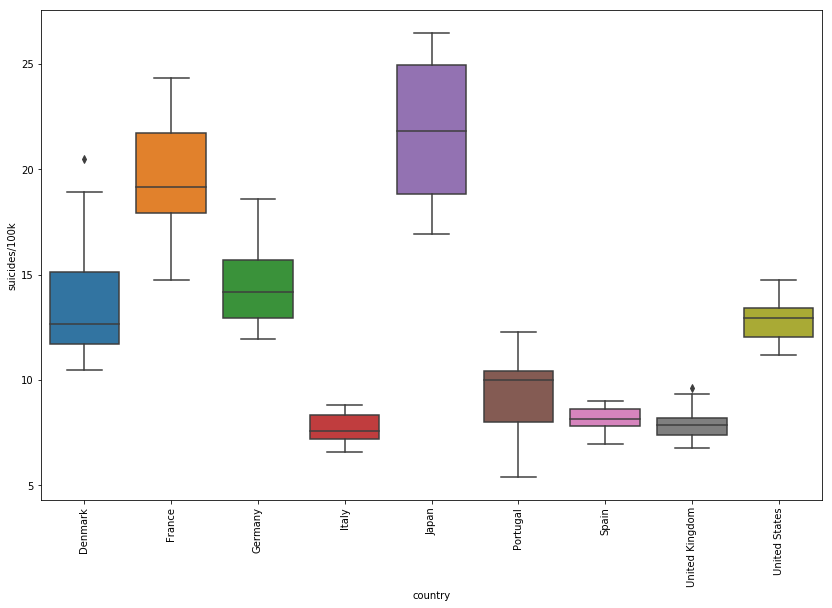

In [91]:
plt.figure(figsize=(14, 9))
ax = sns.boxplot(x = 'country', y = 'suicides/100k', data = df_select)

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

In [116]:
df_2010_piv.corr().iplot(kind='heatmap',colorscale="Blues", title="Feature Correlation Matrix")